/var/folders/c4/0_qk7vd14058g3ld598c7trc0000gn/T/ipykernel_65237/2312306933.py:42: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 640x480 with 0 Axes>

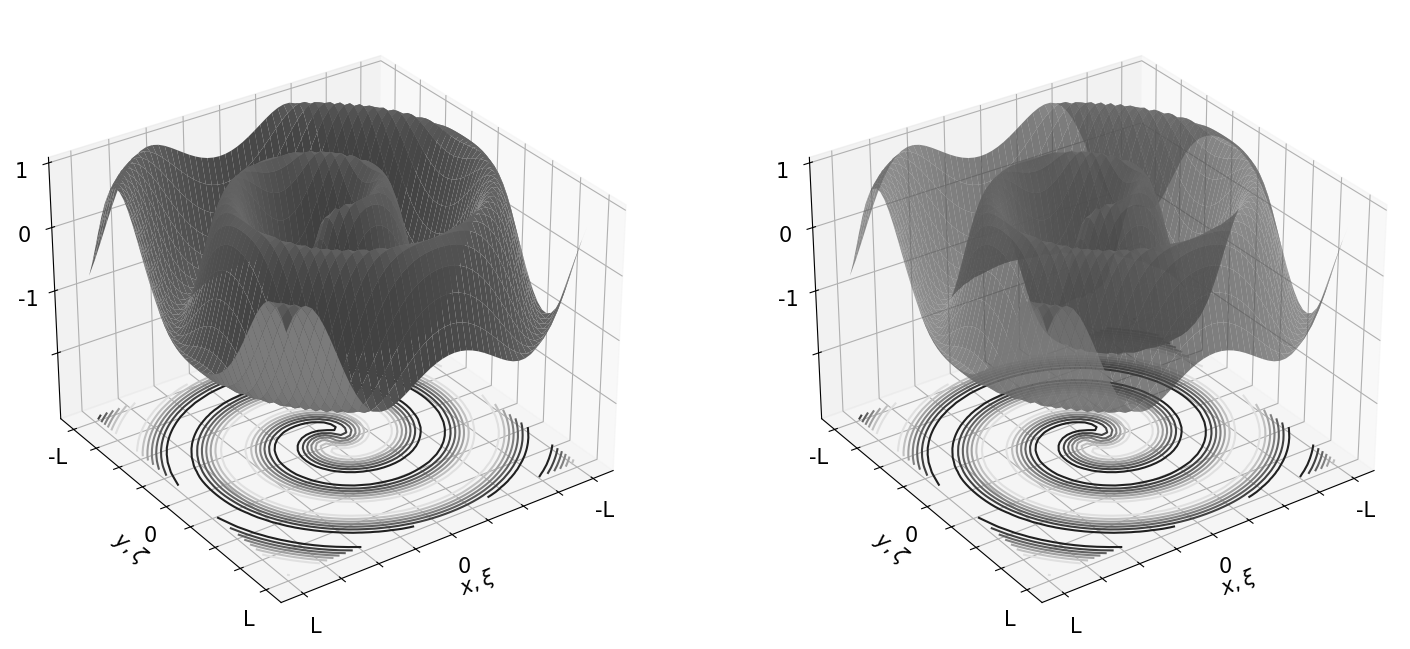

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

L = 10
x = np.linspace(-L, L, 50)
y = x
X, Y = np.meshgrid(x, y)

m = 1  # number of spirals
u = np.tanh(np.sqrt(X**2 + Y**2)) * np.cos(m * np.angle(X 
                            + 1j * Y) - np.sqrt(X**2 + Y**2))

# Plot subplot 1
fig = plt.figure()
fig = plt.figure(figsize=(18, 18))

ax = fig.add_subplot(221, projection='3d')
ax.plot_surface(X, Y, u + 2, color='gray')
ax.contour(X, Y, u, zdir='u', offset=np.min(u), cmap='gray', linestyles='solid')

plt.xlabel(r'$x, \xi$', fontsize=15, fontweight='bold')
plt.ylabel(r'$y, \zeta$', fontsize=15, fontweight='bold')
plt.xticks([-L, -7.5, -5, -2.5, 0, 2.5, 5, 7.5, L], ['-L', ' ', ' ', ' ', '0', ' ', ' ', ' ', 'L'], fontsize=15)
plt.yticks([-L, -7.5, -5, -2.5, 0, 2.5, 5, 7.5, L], ['-L', ' ', ' ', ' ', '0', ' ', ' ', ' ', 'L'], fontsize=15)
ax.set_zticks([0, 1, 2, 3])
ax.set_zticklabels(['', '-1', '0', '1'], fontsize=15)
ax.view_init(elev=30, azim=55)

ax = fig.add_subplot(222, projection='3d')
ax.plot_surface(X, Y, u + 2, color='gray', alpha=0.7)
ax.contour(X, Y, u, zdir='u', offset=np.min(u), cmap='gray', linestyles='solid')

plt.xlabel(r'$x, \xi$', fontsize=15, fontweight='bold')
plt.ylabel(r'$y, \zeta$', fontsize=15, fontweight='bold')
plt.xticks([-L, -7.5, -5, -2.5, 0, 2.5, 5, 7.5, L], ['-L', ' ', ' ', ' ', '0', ' ', ' ', ' ', 'L'], fontsize=15)
plt.yticks([-L, -7.5, -5, -2.5, 0, 2.5, 5, 7.5, L], ['-L', ' ', ' ', ' ', '0', ' ', ' ', ' ', 'L'], fontsize=15)
ax.set_zticks([0, 1, 2, 3])
ax.set_zticklabels(['', '-1', '0', '1'], fontsize=15)
ax.view_init(elev=30, azim=55)

plt.tight_layout()

plt.savefig('adv_plot13new.eps', format='eps', bbox_inches='tight')
plt.show()


Text(0.5, 0, 'Z')

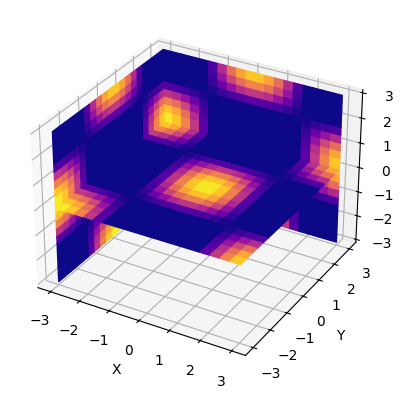

In [40]:
import numpy as np
import scipy.interpolate
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Plot slices of the data at the given coordinates
def plot_slices(x, y, z, data, xslice, yslice, zslice, ax=None):
    if ax is None:
        ax = plt.figure().add_subplot(111, projection='3d')
    # Normalize data to [0, 1] range
    vmin, vmax = data.min(), data.max()
    data_n = (data - vmin) / (vmax - vmin)
    # Take slices interpolating to allow for arbitrary values
    data_x = scipy.interpolate.interp1d(x, data, axis=0)(xslice)
    data_y = scipy.interpolate.interp1d(y, data, axis=1)(yslice)
    data_z = scipy.interpolate.interp1d(z, data, axis=2)(zslice)
    # Pick color map
    cmap = plt.cm.plasma
    # Plot X slice
    xs, ys, zs = data.shape
    xplot = ax.plot_surface(xslice, y[:, np.newaxis], z[np.newaxis, :],
                            rstride=1, cstride=1, facecolors=cmap(data_x), shade=False)
    # Plot Y slice
    yplot = ax.plot_surface(x[:, np.newaxis], yslice, z[np.newaxis, :],
                            rstride=1, cstride=1, facecolors=cmap(data_y), shade=False)
    # Plot Z slice
    zplot = ax.plot_surface(x[:, np.newaxis], y[np.newaxis, :], np.atleast_2d(zslice),
                            rstride=1, cstride=1, facecolors=cmap(data_z), shade=False)
    return xplot, yplot, zplot


x = np.linspace(-3, 3, 20)
y = x
z = x
X, Y, Z = np.meshgrid(x, y, z)
u = np.cos(X) * np.cos(Y) * np.cos(Z)

ax = plt.figure().add_subplot(111, projection='3d')
plot_slices(x, y, z, u, -3, 3, 0, ax=ax)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')